<a href="https://colab.research.google.com/github/greengerong/awesome-llm/blob/main/colab/stable-video/Stable_Video_Diffusion_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 环境设置

In [ ]:
!pip install -q -U diffusers transformers accelerate

# 推理

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

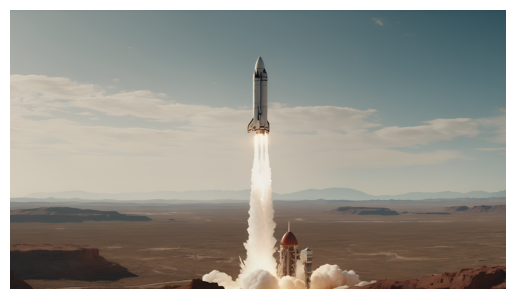

  0%|          | 0/25 [00:00<?, ?it/s]

'generated.mp4'

In [1]:
import torch

from diffusers import StableVideoDiffusionPipeline
from diffusers.utils import load_image, export_to_video
from matplotlib import pyplot as plt

pipe = StableVideoDiffusionPipeline.from_pretrained(
    "stabilityai/stable-video-diffusion-img2vid-xt", torch_dtype=torch.float16, variant="fp16"
)
pipe.enable_model_cpu_offload()
# pipe.to("cuda")
# pipe.unet = torch.compile(pipe.unet, mode="reduce-overhead", fullgraph=True)

# Load the conditioning image
image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/svd/rocket.png")

plt.imshow(image)
plt.axis("off")
plt.show()

image = image.resize((1024, 576))

generator = torch.manual_seed(42)
# frames = pipe(image, decode_chunk_size=8, generator=generator).frames[0]
# pipe.unet.enable_forward_chunking()
# frames = pipe(image, decode_chunk_size=2, generator=generator, num_frames=25).frames[0]
frames = pipe(image, decode_chunk_size=8, generator=generator, motion_bucket_id=180, noise_aug_strength=0.1).frames[0]

export_to_video(frames, "generated.mp4", fps=7)

In [3]:
import moviepy.editor
moviepy.editor.ipython_display("/content/generated.mp4")